Projede kullanılan ve devamında kullanılacak kütüphanelerin eklenmesi

In [1]:
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random
import seaborn as sns
import matplotlib.pyplot as plt

Ana ve test veri setinin yolunun tanımlanması

In [2]:
train_url = 'https://raw.githubusercontent.com/hgurses/NSL-KDD-Odev3/master/NSL_KDD_Train.csv'
test_url = 'https://raw.githubusercontent.com/hgurses/NSL-KDD-Odev3/master/NSL_KDD_Test.csv'

Veri seti içerisindeki sütunların belirtilmesi, verinin değişkene aktarılması

In [3]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


df = pd.read_csv(train_url,header=None, names = col_names)

df_test = pd.read_csv(test_url, header=None, names = col_names)

print('Dimensions of the Training set:',df.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


Veri içerisindeki ilk 5 satırı gösterme işlemi

In [4]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


describe() fonksiyonunu kullanarak temel istatistiklerin alınması. Bu, sayısal sütunlardaki temel istatistik bilgileri (ortalama, standart sapma, minimum, maksimum, çeyreklikler) sağlar.

In [5]:

print(df.describe())

           duration     src_bytes     dst_bytes           land  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086   
min         0.00000  0.000000e+00  0.000000e+00       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125973.000000  125973.000000  125973.000000      125973.000000   
mean         0.022687       0.000111       0.204409           0.001222   
std          0.253530       0.014366       2.149968           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.00000

info() fonksiyonunu kullanarak her sütundaki veri türlerini ve eksik veri sayılarının kontrol edilmesi.

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

Sınıfların dağılımının incelenmesi. Bu, dengesiz sınıflar veya veri seti hakkında dikkate değer bilgiler sağlayabilir.

In [7]:
print(df['flag'].value_counts())
print(df['protocol_type'].value_counts())
print(df['service'].value_counts())


flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64
protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64


In [8]:
print('Label distribution Training set:')
print(df['label'].value_counts())
print()
print('Label distribution Test set:')
print(df_test['label'].value_counts())

Label distribution Training set:
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

Label distribution Test set:
label
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattac

**Veri Ön İşleme (1.Aşama)**

One-Hot-Encoding, tüm kategorik özellikleri ikili özelliklere dönüştürmek için kullanılır. One-Hot-Endcoding gereksinimi, bu transformatöre giriş, kategorik(ayrık) özelliklerle alınan değerleri ifade eden bir tam sayı matrisi olmalıdır. Çıktı, her bir sütunun olası bir değere karşılık geldiği seyrek bir matris olacaktır. Giriş özelliklerinin [0, n_values] aralığında değerler aldıkları varsayılmaktadır. Bu nedenle her kategoriyi bir sayıya dönüştürmek için özelliklerin öncelikle LabelEncoder ile dönüştürülmesi gerekir.

Training set:
Feature 'protocol_type' has 3 categories


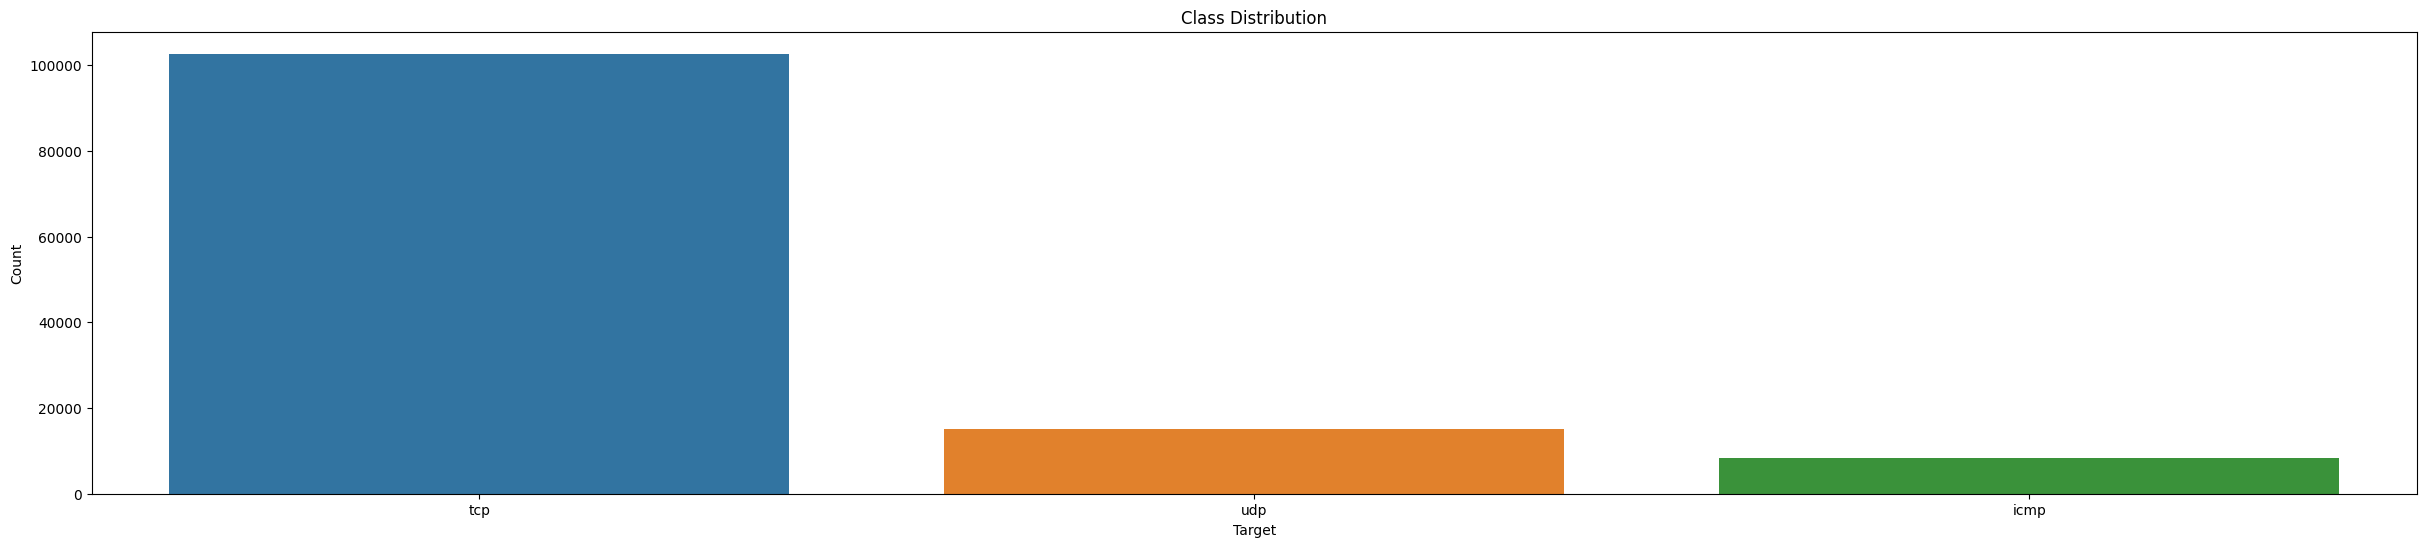

Feature 'service' has 70 categories


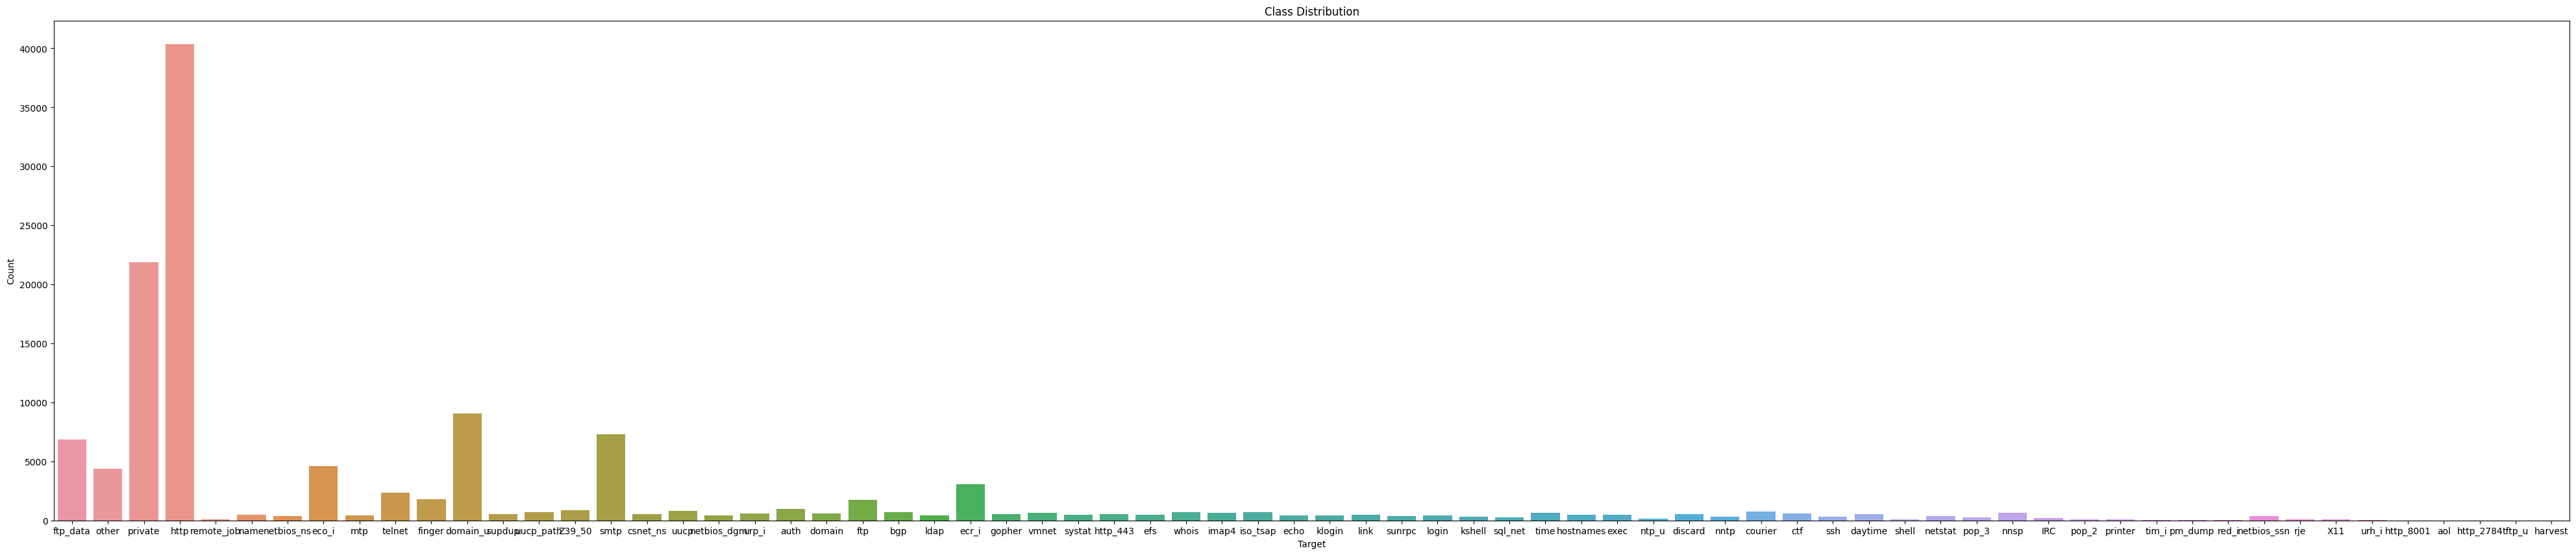

Feature 'flag' has 11 categories


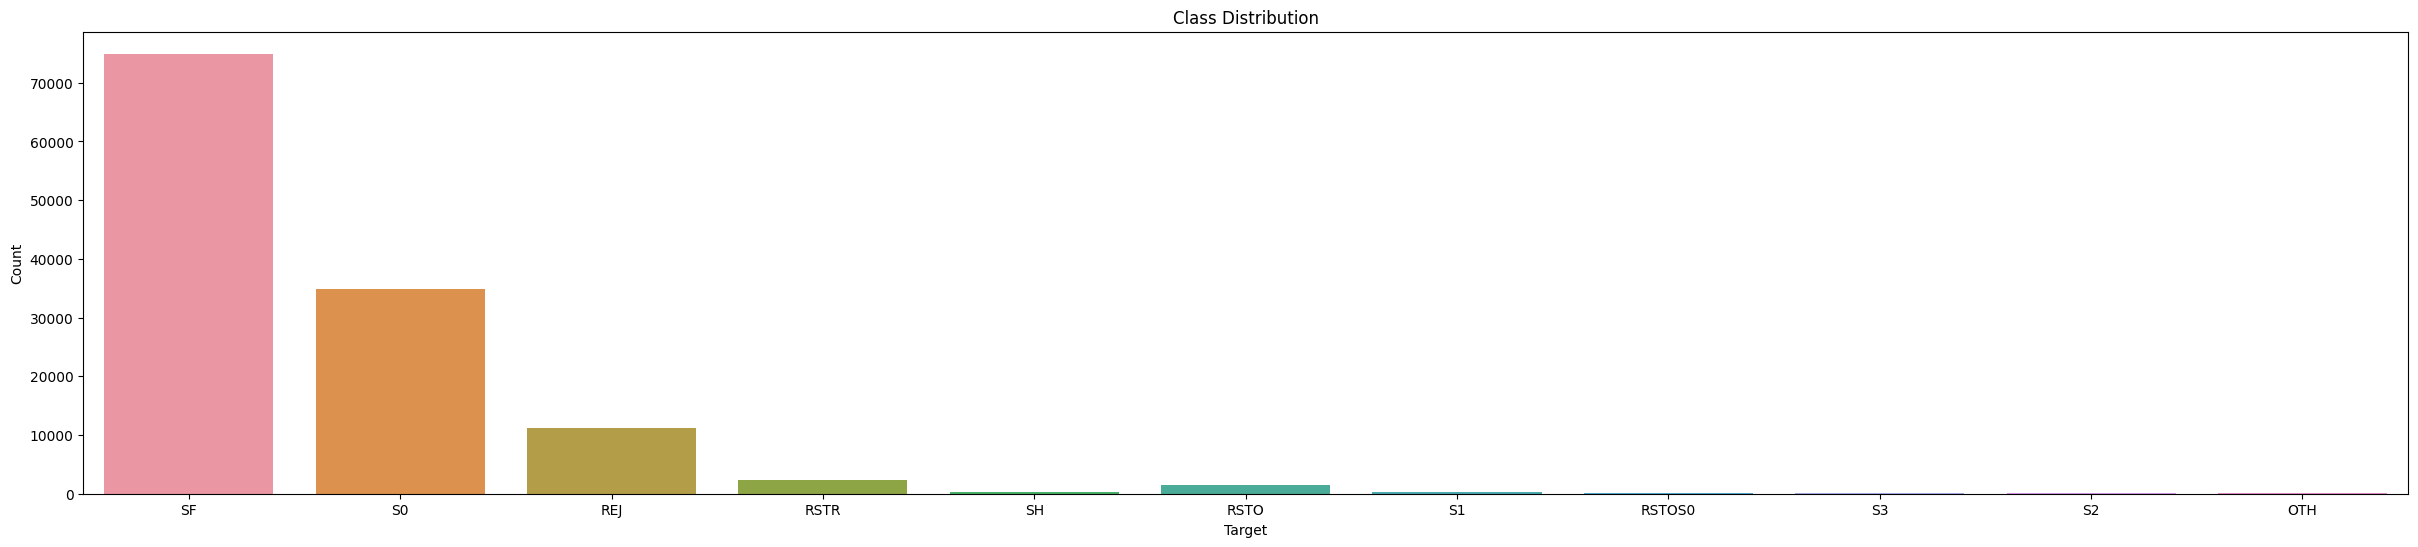

Feature 'label' has 23 categories


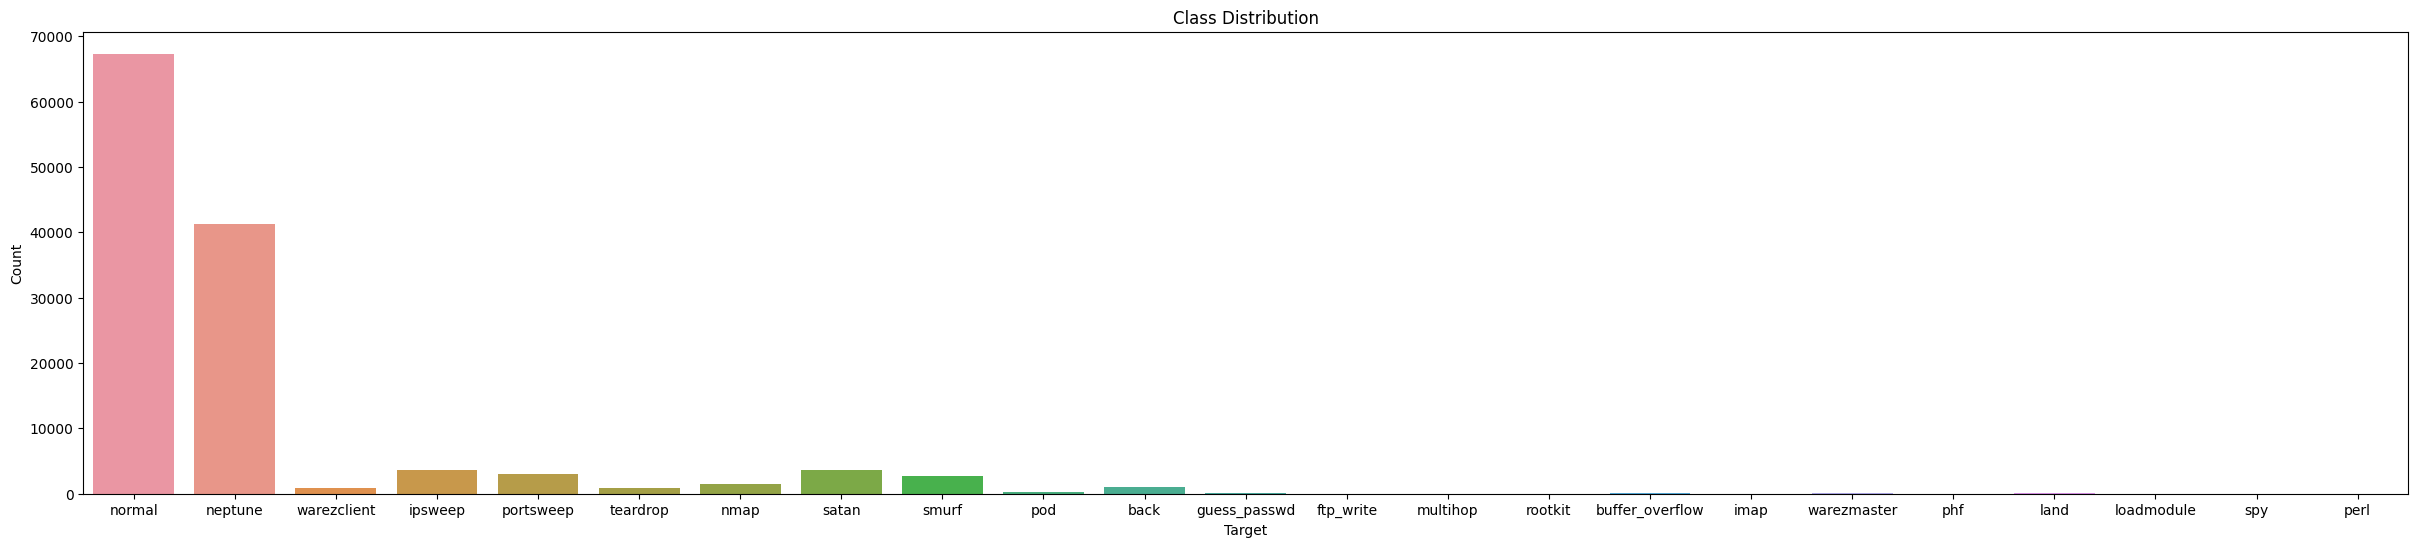


Distribution of categories in service:
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: count, dtype: int64


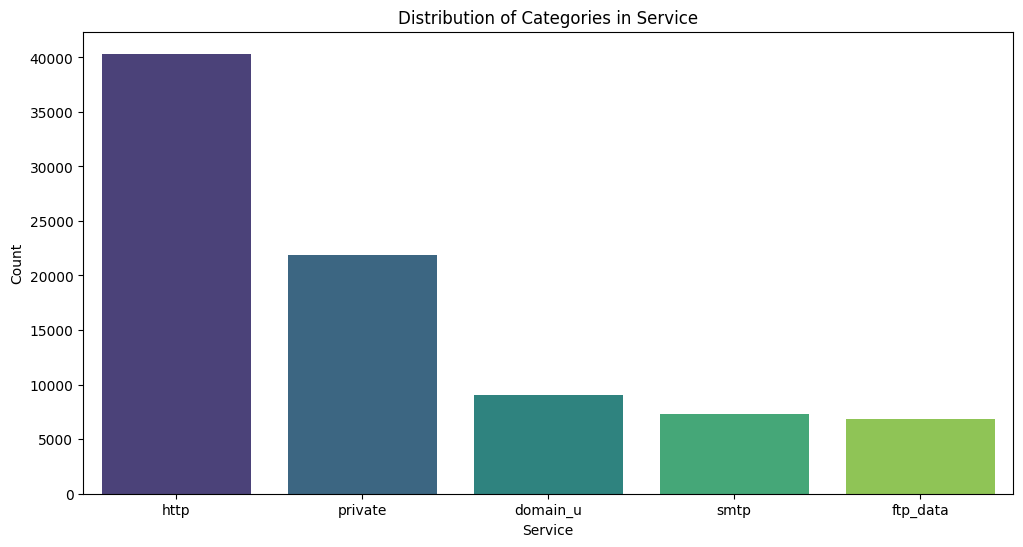

In [9]:
# sütunlar kategorik, henüz binary değil: protocol_type (column 2), service (column 3), flag (column 4).

print('Training set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))
        if  col_name == "service":
            plt.figure(figsize=(50, 10))
        else:
            plt.figure(figsize=(30, 6))
        sns.countplot(x=col_name, data=df)
        plt.title('Class Distribution')
        plt.xlabel('Target')
        plt.ylabel('Count')
        plt.show()

print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())


# Kategorilerin dağılımını al
category_counts = df['service'].value_counts().sort_values(ascending=False).head()
# Veriyi DataFrame'e dönüştür
category_df = pd.DataFrame({'Service': category_counts.index, 'Count': category_counts.values})
# Grafik boyutu ayarlama
plt.figure(figsize=(12, 6))
# sns.countplot ile grafiği oluşturma
sns.barplot(x='Service', y='Count', data=category_df, palette='viridis')
plt.title('Distribution of Categories in Service')
plt.xlabel('Service')
plt.ylabel('Count')
# Grafikleri göster
plt.show()

In [10]:
# Test set
print('Test set:')
for col_name in df_test.columns:
    if df_test[col_name].dtypes == 'object' :
        unique_cat = len(df_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))


Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories


**LabelEncoder**

**Kategorik özellikleri 2B numpy dizisine ekleme**

In [155]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']

df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]

df_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [12]:
# protocol type
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
print(unique_protocol2)

# service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
print(unique_service2)


# flag
unique_flag=sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
print(unique_flag2)



# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2


#do it for test set
unique_service_test=sorted(df_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2


['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp']
['service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'ser

**LabelEncoder()'ı kullanarak kategorik özellikleri sayılara dönüştürme**


In [13]:
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)

print(df_categorical_values.head())
print('--------------------')
print(df_categorical_values_enc.head())

# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)


  protocol_type   service flag
0           tcp  ftp_data   SF
1           udp     other   SF
2           tcp   private   S0
3           tcp      http   SF
4           tcp      http   SF
--------------------
   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


**One-Hot-Encoding**

In [14]:
enc = OneHotEncoder(categories='auto')
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(),columns=dumcols)


# test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(),columns=testdumcols)

df_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Test setteki eksik sütunlar eklenir**

In [16]:
trainservice=df['service'].tolist()
testservice= df_test['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_http_8001',
 'service_aol',
 'service_red_i',
 'service_harvest',
 'service_urh_i',
 'service_http_2784']

In [17]:
for col in difference:
    testdf_cat_data[col] = 0

print(df_cat_data.shape)    
print(testdf_cat_data.shape)

(125973, 84)
(22544, 84)


**Ana dataframe'e yeni sayısal sütunlar eklenir**

In [156]:
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)

# test data
newdf_test=df_test.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)

print(newdf.shape)
print(newdf_test.shape)

(125973, 123)
(22544, 123)


 Dataset her atak kategorisi için ayrı datasetlere ayrıldı. Atak etiketleri her biri için yeniden adlandırıldı. 0=Normal, 1=DoS, 2=Probe, 3=R2L, 4=U2R. Yeni datasetlerde etiket sütunu yeni değerler ile değiştirildi.
 
 DoS : 
 
 Probe : 
 
 R2L :
 
 U2R :

In [19]:
labeldf=newdf['label']
labeldf_test=newdf_test['label']


# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})



# put the new label column back
newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test

In [21]:
to_drop_DoS = [0,1]
to_drop_Probe = [0,2]
to_drop_R2L = [0,3]
to_drop_U2R = [0,4]

# Kendisi dışındaki label değerine sahip tüm satırları filtrele
# isin filter function

DoS_df=newdf[newdf['label'].isin(to_drop_DoS)];
Probe_df=newdf[newdf['label'].isin(to_drop_Probe)];
R2L_df=newdf[newdf['label'].isin(to_drop_R2L)];
U2R_df=newdf[newdf['label'].isin(to_drop_U2R)];



#test
DoS_df_test=newdf_test[newdf_test['label'].isin(to_drop_DoS)];
Probe_df_test=newdf_test[newdf_test['label'].isin(to_drop_Probe)];
R2L_df_test=newdf_test[newdf_test['label'].isin(to_drop_R2L)];
U2R_df_test=newdf_test[newdf_test['label'].isin(to_drop_U2R)];


print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print()
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)


Train:
Dimensions of DoS: (113270, 123)
Dimensions of Probe: (78999, 123)
Dimensions of R2L: (68338, 123)
Dimensions of U2R: (67395, 123)

Test:
Dimensions of DoS: (17171, 123)
Dimensions of Probe: (12132, 123)
Dimensions of R2L: (12596, 123)
Dimensions of U2R: (9778, 123)


**Özellik Ölçeklendirme (2.Aşama)**

In [22]:
# Split dataframes into X & Y
# X Özellikler , Y sonuç değişkenleri

X_DoS = DoS_df.drop('label',axis=1)
Y_DoS = DoS_df.label

X_Probe = Probe_df.drop('label',axis=1)
Y_Probe = Probe_df.label

X_R2L = R2L_df.drop('label',axis=1)
Y_R2L = R2L_df.label

X_U2R = U2R_df.drop('label',axis=1)
Y_U2R = U2R_df.label

# test set
X_DoS_test = DoS_df_test.drop('label',axis=1)
Y_DoS_test = DoS_df_test.label

X_Probe_test = Probe_df_test.drop('label',axis=1)
Y_Probe_test = Probe_df_test.label

X_R2L_test = R2L_df_test.drop('label',axis=1)
Y_R2L_test = R2L_df_test.label

X_U2R_test = U2R_df_test.drop('label',axis=1)
Y_U2R_test = U2R_df_test.label


**Sütun isimleri bu aşamada silineceği için daha sonra kullanmak üzere sütun isimlerini kayıt ederiz.**

In [23]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)

In [24]:
from sklearn import preprocessing

scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS) 

scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe)

scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L)

scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R) 

# test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test) 

scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test) 

scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test) 

scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test)

**Öznitelik Seçimi (3.Aşama)**

---

**Özyinelemeli Özellik Eliminasyonu (RFE) [en iyi 13 özellik]**

# Random Forest

In [25]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=10,n_jobs=2)
rfe = RFE(estimator=clf, n_features_to_select=13, step=1)

rfe.fit(X_DoS, Y_DoS.astype(int))
X_rfeDoS=rfe.transform(X_DoS)
true=rfe.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

In [26]:
rfe.fit(X_Probe, Y_Probe.astype(int))
X_rfeProbe=rfe.transform(X_Probe)
true=rfe.support_
rfecolindex_Probe=[i for i, x in enumerate(true) if x]
rfecolname_Probe=list(colNames[i] for i in rfecolindex_Probe)


In [27]:
rfe.fit(X_R2L, Y_R2L.astype(int))
X_rfeR2L=rfe.transform(X_R2L)
true=rfe.support_
rfecolindex_R2L=[i for i, x in enumerate(true) if x]
rfecolname_R2L=list(colNames[i] for i in rfecolindex_R2L)

In [28]:
rfe.fit(X_U2R, Y_U2R.astype(int))
X_rfeU2R=rfe.transform(X_U2R)
true=rfe.support_
rfecolindex_U2R=[i for i, x in enumerate(true) if x]
rfecolname_U2R=list(colNames[i] for i in rfecolindex_U2R)

**RFE tarafından seçilen özelliklerin özeti**

In [158]:
print('Seçilen özellikler DoS:',rfecolname_DoS)
print()
print('Seçilen özellikler Probe:',rfecolname_Probe)
print()
print('Seçilen özellikler R2L:',rfecolname_R2L)
print()
print('Seçilen özellikler U2R:',rfecolname_U2R)


Seçilen özellikler DoS: ['src_bytes', 'dst_bytes', 'wrong_fragment', 'num_compromised', 'count', 'srv_count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_serror_rate', 'dst_host_rerror_rate', 'Protocol_type_icmp', 'service_ecr_i', 'flag_S0']

Seçilen özellikler Probe: ['src_bytes', 'dst_bytes', 'count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Protocol_type_icmp', 'service_eco_i', 'service_private']

Seçilen özellikler R2L: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp', 'service_ftp_data']

Seçilen özellikler U2R: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'root_shell', 'num_root', 'num_file_creations', 'count', 'dst_host_count', 'ds

In [83]:
print(X_rfeDoS.shape)
print(X_rfeProbe.shape)
print(X_rfeR2L.shape)
print(X_rfeU2R.shape)



(113270, 13)
(78999, 13)
(68338, 13)
(67395, 13)


**Modeli Oluşturma (4.Aşama)**

Sınıflandırıcı, daha sonraki karşılaştırmalar için tüm özellikler ve azaltılmış özellikler için eğitilmiştir.

Sınıflandırıcı modelinin kendisi clf değişkeninde saklanır.

In [159]:
# tüm özellikler
clf_DoS=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_Probe=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_R2L=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_U2R=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_U2R.fit(X_U2R, Y_U2R.astype(int))

RandomForestClassifier(n_estimators=10, n_jobs=2)

In [32]:
# seçilen özellikler
clf_rfeDoS=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_rfeProbe=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_rfeR2L=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_rfeU2R=RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_rfeDoS.fit(X_rfeDoS, Y_DoS.astype(int))
clf_rfeProbe.fit(X_rfeProbe, Y_Probe.astype(int))
clf_rfeR2L.fit(X_rfeR2L, Y_R2L.astype(int))
clf_rfeU2R.fit(X_rfeU2R, Y_U2R.astype(int))

RandomForestClassifier(n_estimators=10, n_jobs=2)

**Tahmin ve Değerlendirme (doğrulama) (5.Aşama)**


---



Her kategori için tüm Özellikleri kullanma

Karışıklık Matrisleri

---



DoS¶

In [85]:
# Eğittiğimiz sınıflandırıcıyı (daha önce hiç görmediği) test verilerine uygulanması
clf_DoS.predict(X_DoS_test)

array([0, 0, 0, ..., 0, 0, 0])

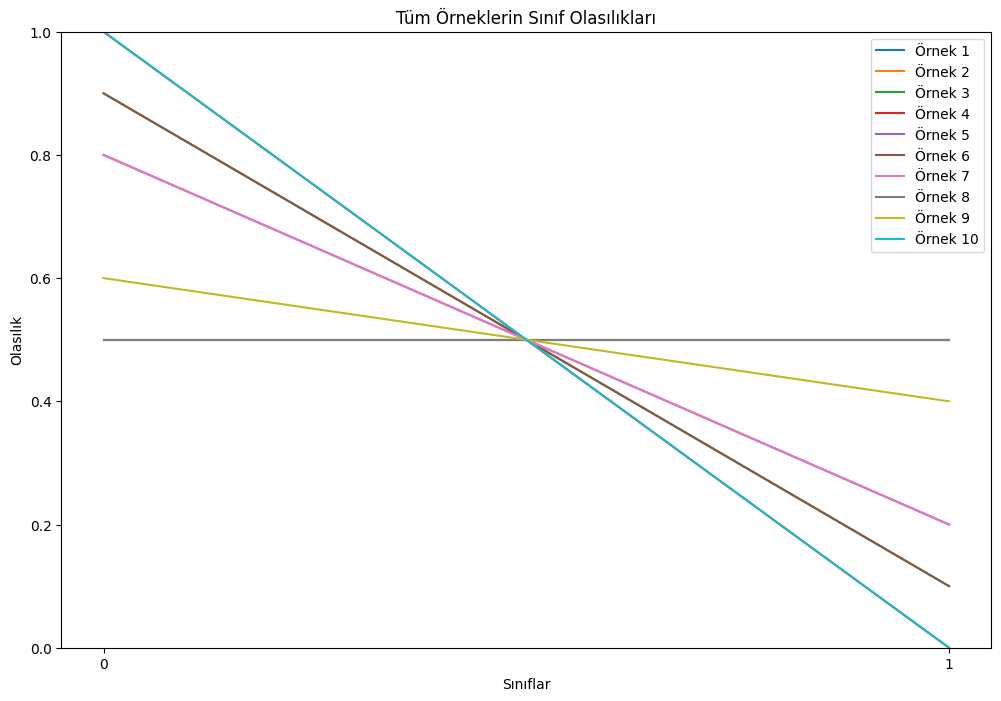

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.9, 0.1],
       [1. , 0. ],
       [0.8, 0.2],
       [0.9, 0.1],
       [0.8, 0.2],
       [0.5, 0.5],
       [0.6, 0.4],
       [1. , 0. ]])

In [181]:
#Olasılıkların grafikle gösterilmesi
proba_predictions = clf_DoS.predict_proba(X_DoS_test)[0:10]
num_classes = proba_predictions.shape[1]
plt.figure(figsize=(12, 8))
for i in range(len(proba_predictions)):
    plt.plot(range(num_classes), proba_predictions[i], label=f'Örnek {i+1}')

plt.xlabel('Sınıflar')
plt.ylabel('Olasılık')
plt.title('Tüm Örneklerin Sınıf Olasılıkları')
plt.legend()
plt.xticks(range(num_classes))
plt.ylim([0, 1])
plt.show()

# İlk 10 gözlemin tahmin edilen olasılıkları
clf_DoS.predict_proba(X_DoS_test)[0:10]


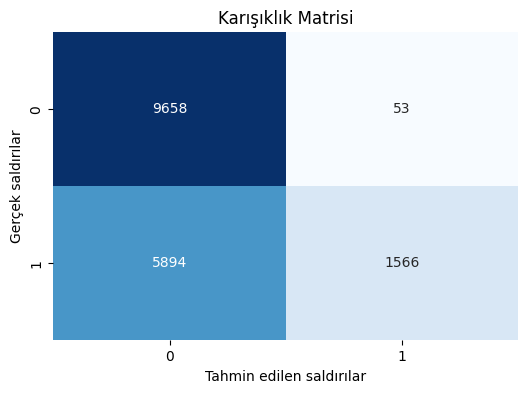

Tahmin edilen saldırılar,0,1
Gerçek saldırılar,,
0,9658,53
1,5894,1566


In [160]:
Y_DoS_pred=clf_DoS.predict(X_DoS_test)

# grafik gösterimi
crosstab_data = pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Gerçek saldırılar'], colnames=['Tahmin edilen saldırılar'])
plt.figure(figsize=(6, 4))
sns.heatmap(crosstab_data, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Karışıklık Matrisi')
plt.show()

# Karışıklık matrisi oluşturun
pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Gerçek saldırılar'], colnames=['Tahmin edilen saldırılar'])

**Probe**

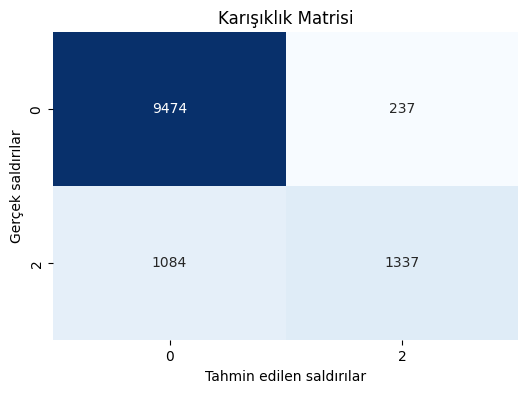

Tahmin edilen saldırılar,0,2
Gerçek saldırılar,,
0,9474,237
2,1084,1337


In [161]:
Y_Probe_pred=clf_Probe.predict(X_Probe_test)

# grafik gösterimi
crosstab_data = pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Gerçek saldırılar'], colnames=['Tahmin edilen saldırılar'])
plt.figure(figsize=(6, 4))
sns.heatmap(crosstab_data, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Karışıklık Matrisi')
plt.show()


# Karışıklık matrisi oluşturun
pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Gerçek saldırılar'], colnames=['Tahmin edilen saldırılar'])



**R2L**

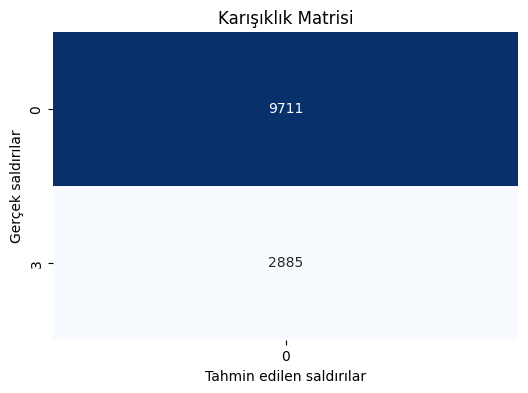

Tahmin edilen saldırılar,0
Gerçek saldırılar,
0,9711
3,2885


In [162]:
Y_R2L_pred=clf_R2L.predict(X_R2L_test)

# grafik gösterimi
crosstab_data = pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Gerçek saldırılar'], colnames=['Tahmin edilen saldırılar'])
plt.figure(figsize=(6, 4))
sns.heatmap(crosstab_data, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Karışıklık Matrisi')
plt.show()

# Karışıklık matrisi oluşturun
pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Gerçek saldırılar'], colnames=['Tahmin edilen saldırılar'])



**U2R**

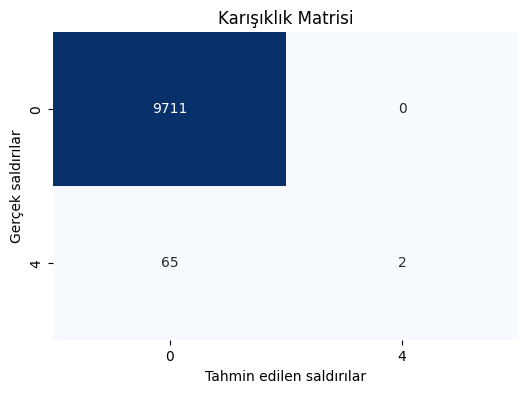

Tahmin edilen saldırılar,0,4
Gerçek saldırılar,,
0,9711,0
4,65,2


In [163]:
Y_U2R_pred=clf_U2R.predict(X_U2R_test)

# grafik gösterimi
crosstab_data = pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Gerçek saldırılar'], colnames=['Tahmin edilen saldırılar'])
plt.figure(figsize=(6, 4))
sns.heatmap(crosstab_data, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Karışıklık Matrisi')
plt.show()

# Karışıklık matrisi oluşturulması
pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Gerçek saldırılar'], colnames=['Tahmin edilen saldırılar'])

**Çapraz Doğrulama: Accuracy, Precision, Recall, F-measure**

Doğruluk, Hassasiyet, Geri Çağırma, F-Ölçü

**DoS**

Accuracy: 0.99790 (+/- 0.00245)
Precision: 0.99892 (+/- 0.00162)
Recall: 0.99692 (+/- 0.00295)
F-measure: 0.99765 (+/- 0.00183)


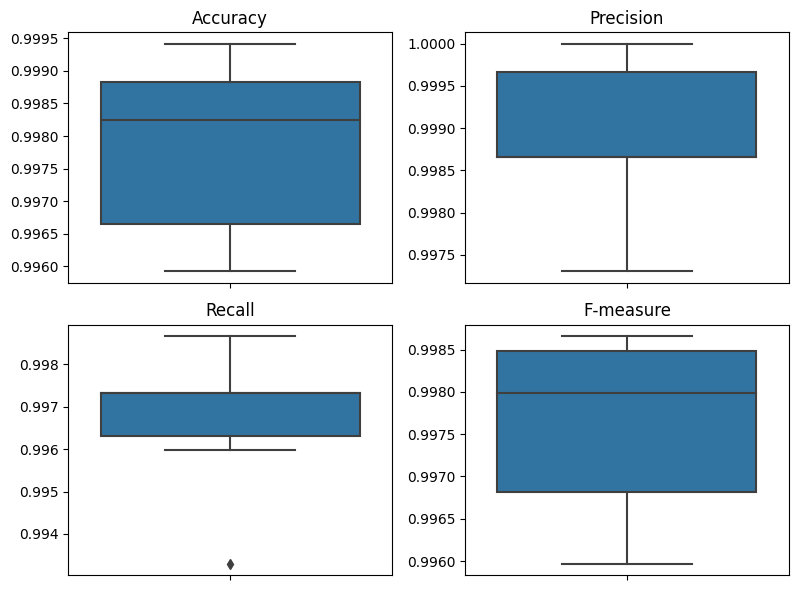

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

#Grafiğin oluşturulması
# Plotting
plt.figure(figsize=(8, 6))
# Accuracy
plt.subplot(2, 2, 1)
sns.boxplot(y=accuracy)
plt.title('Accuracy')
# Precision
plt.subplot(2, 2, 2)
sns.boxplot(y=precision)
plt.title('Precision')
# Recall
plt.subplot(2, 2, 3)
sns.boxplot(y=recall)
plt.title('Recall')
# F-measure
plt.subplot(2, 2, 4)
sns.boxplot(y=f)
plt.title('F-measure')
plt.tight_layout()
plt.show()


**Probe**

Accuracy: 0.99646 (+/- 0.00305)
Precision: 0.99690 (+/- 0.00332)
Recall: 0.99406 (+/- 0.00703)
F-measure: 0.99508 (+/- 0.00463)


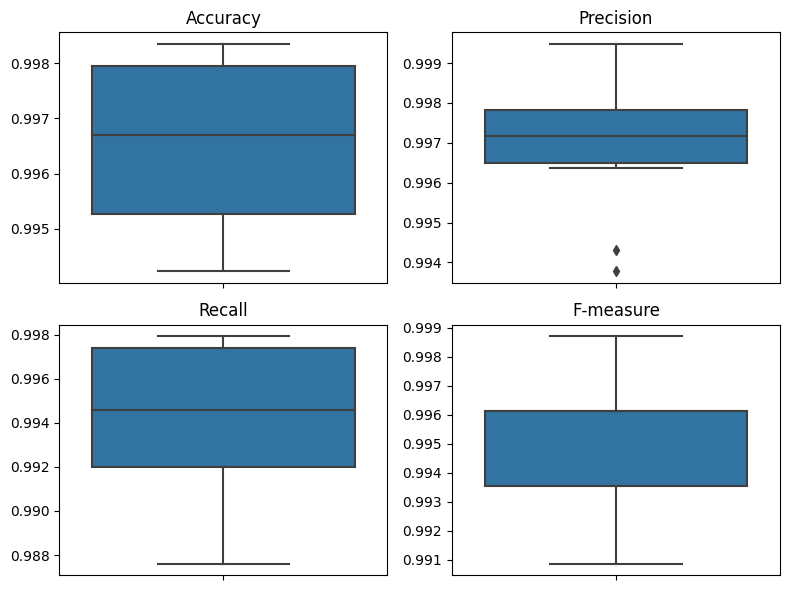

In [117]:
accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

#Grafiğin oluşturulması
# Plotting
plt.figure(figsize=(8, 6))
# Accuracy
plt.subplot(2, 2, 1)
sns.boxplot(y=accuracy)
plt.title('Accuracy')
# Precision
plt.subplot(2, 2, 2)
sns.boxplot(y=precision)
plt.title('Precision')
# Recall
plt.subplot(2, 2, 3)
sns.boxplot(y=recall)
plt.title('Recall')
# F-measure
plt.subplot(2, 2, 4)
sns.boxplot(y=f)
plt.title('F-measure')
plt.tight_layout()
plt.show()

**U2R**

Accuracy: 0.99714 (+/- 0.00153)
Precision: 0.97236 (+/- 0.08204)
Recall: 0.85927 (+/- 0.13695)
F-measure: 0.88105 (+/- 0.10944)


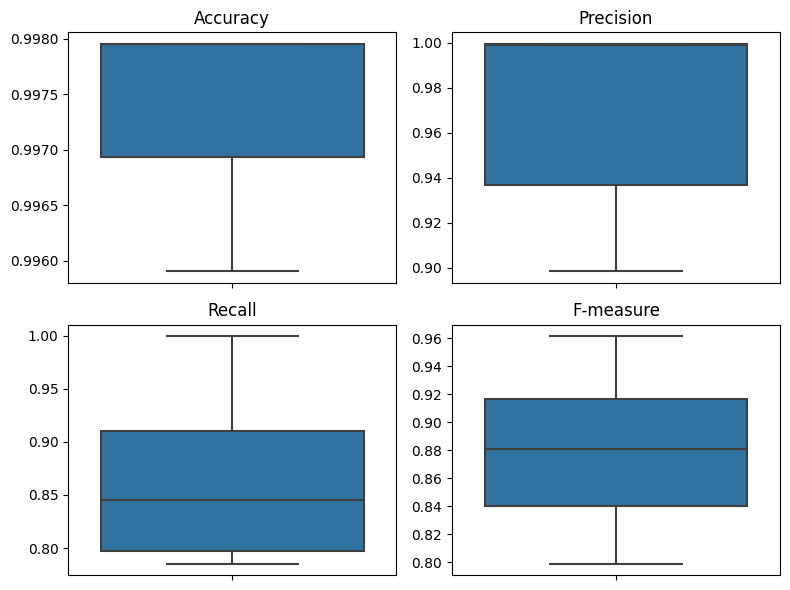

In [118]:
accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

#Grafiğin oluşturulması
# Plotting
plt.figure(figsize=(8, 6))
# Accuracy
plt.subplot(2, 2, 1)
sns.boxplot(y=accuracy)
plt.title('Accuracy')
# Precision
plt.subplot(2, 2, 2)
sns.boxplot(y=precision)
plt.title('Precision')
# Recall
plt.subplot(2, 2, 3)
sns.boxplot(y=recall)
plt.title('Recall')
# F-measure
plt.subplot(2, 2, 4)
sns.boxplot(y=f)
plt.title('F-measure')
plt.tight_layout()
plt.show()


**R2L**

Accuracy: 0.97999 (+/- 0.00767)
Precision: 0.97417 (+/- 0.01297)
Recall: 0.96830 (+/- 0.01340)
F-measure: 0.97314 (+/- 0.00739)


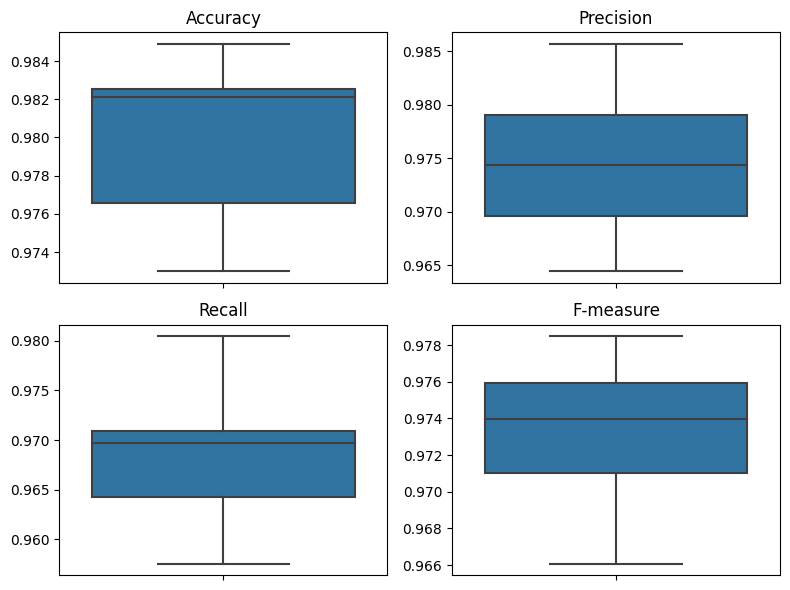

In [119]:
accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

#Grafiğin oluşturulması
# Plotting
plt.figure(figsize=(8, 6))
# Accuracy
plt.subplot(2, 2, 1)
sns.boxplot(y=accuracy)
plt.title('Accuracy')
# Precision
plt.subplot(2, 2, 2)
sns.boxplot(y=precision)
plt.title('Precision')
# Recall
plt.subplot(2, 2, 3)
sns.boxplot(y=recall)
plt.title('Recall')
# F-measure
plt.subplot(2, 2, 4)
sns.boxplot(y=f)
plt.title('F-measure')
plt.tight_layout()
plt.show()

**Her kategori için 13 Özelliğin kullanılması**


Karışıklık Matrisleri

DoS

In [43]:
# test veri kümesini 13 özelliğe düşürülmesi
X_DoS_test2=X_DoS_test[:,rfecolindex_DoS]
X_Probe_test2=X_Probe_test[:,rfecolindex_Probe]
X_R2L_test2=X_R2L_test[:,rfecolindex_R2L]
X_U2R_test2=X_U2R_test[:,rfecolindex_U2R]
X_U2R_test2.shape

(9778, 13)

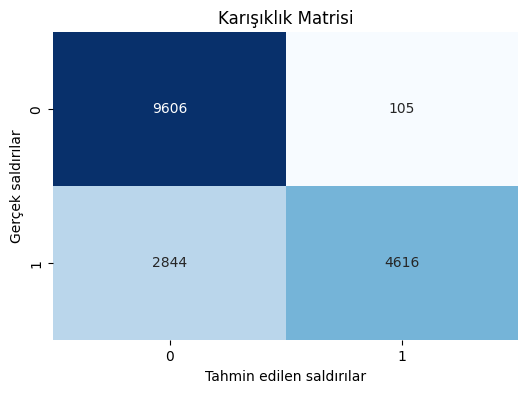

Tahmin edilen saldırılar,0,1
Gerçek saldırılar,,
0,9606,105
1,2844,4616


In [164]:
Y_DoS_pred2=clf_rfeDoS.predict(X_DoS_test2)

# grafik gösterimi
crosstab_data = pd.crosstab(Y_DoS_test, Y_DoS_pred2, rownames=['Gerçek saldırılar'], colnames=['Tahmin edilen saldırılar'])
plt.figure(figsize=(6, 4))
sns.heatmap(crosstab_data, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Karışıklık Matrisi')
plt.show()

# Karışıklık matrisi oluşturulması
pd.crosstab(Y_DoS_test, Y_DoS_pred2, rownames=['Gerçek saldırılar'], colnames=['Tahmin edilen saldırılar'])

**Probe**

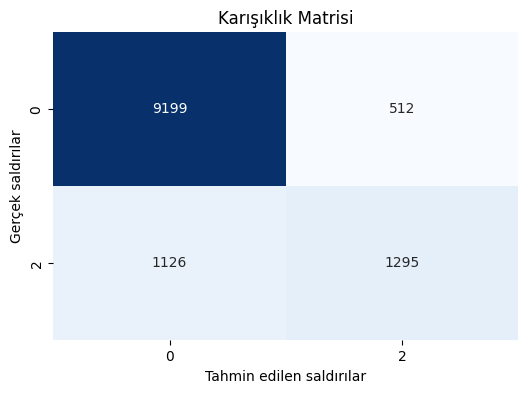

Tahmin edilen saldırılar,0,2
Gerçek saldırılar,,
0,9199,512
2,1126,1295


In [165]:
Y_Probe_pred2=clf_rfeProbe.predict(X_Probe_test2)

# grafik gösterimi
crosstab_data = pd.crosstab(Y_Probe_test, Y_Probe_pred2, rownames=['Gerçek saldırılar'], colnames=['Tahmin edilen saldırılar'])
plt.figure(figsize=(6, 4))
sns.heatmap(crosstab_data, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Karışıklık Matrisi')
plt.show()

# Karışıklık matrisi oluşturulması
pd.crosstab(Y_Probe_test, Y_Probe_pred2, rownames=['Gerçek saldırılar'], colnames=['Tahmin edilen saldırılar'])


**R2L**

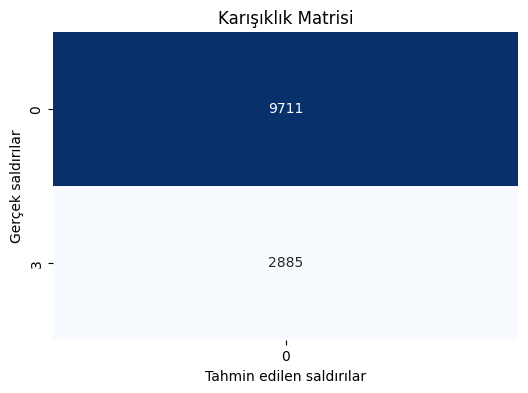

Tahmin edilen saldırılar,0
Gerçek saldırılar,
0,9711
3,2885


In [166]:
Y_R2L_pred2=clf_rfeR2L.predict(X_R2L_test2)

# grafik gösterimi
crosstab_data = pd.crosstab(Y_R2L_test, Y_R2L_pred2, rownames=['Gerçek saldırılar'], colnames=['Tahmin edilen saldırılar'])
plt.figure(figsize=(6, 4))
sns.heatmap(crosstab_data, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Karışıklık Matrisi')
plt.show()


# Karışıklık matrisi oluşturulması
pd.crosstab(Y_R2L_test, Y_R2L_pred2, rownames=['Gerçek saldırılar'], colnames=['Tahmin edilen saldırılar'])


**U2R**

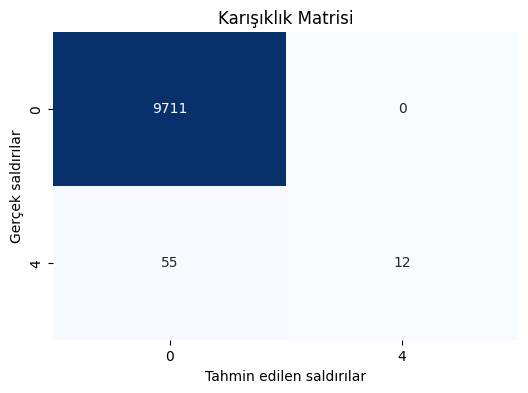

Tahmin edilen saldırılar,0,4
Gerçek saldırılar,,
0,9711,0
4,55,12


In [167]:
Y_U2R_pred2=clf_rfeU2R.predict(X_U2R_test2)

# grafik gösterimi
crosstab_data = pd.crosstab(Y_U2R_test, Y_U2R_pred2, rownames=['Gerçek saldırılar'], colnames=['Tahmin edilen saldırılar'])
plt.figure(figsize=(6, 4))
sns.heatmap(crosstab_data, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Karışıklık Matrisi')
plt.show()


# Karışıklık matrisi oluşturulması
pd.crosstab(Y_U2R_test, Y_U2R_pred2, rownames=['Gerçek saldırılar'], colnames=['Tahmin edilen saldırılar'])

**Çapraz Doğrulama: Accuracy, Precision, Recall, F-measure**

Doğruluk, Hassasiyet, Geri Çağırma, F-Ölçü

**DoS**


Accuracy: 0.99697 (+/- 0.00341)
Precision: 0.99799 (+/- 0.00247)
Recall: 0.99598 (+/- 0.00432)
F-measure: 0.99678 (+/- 0.00280)


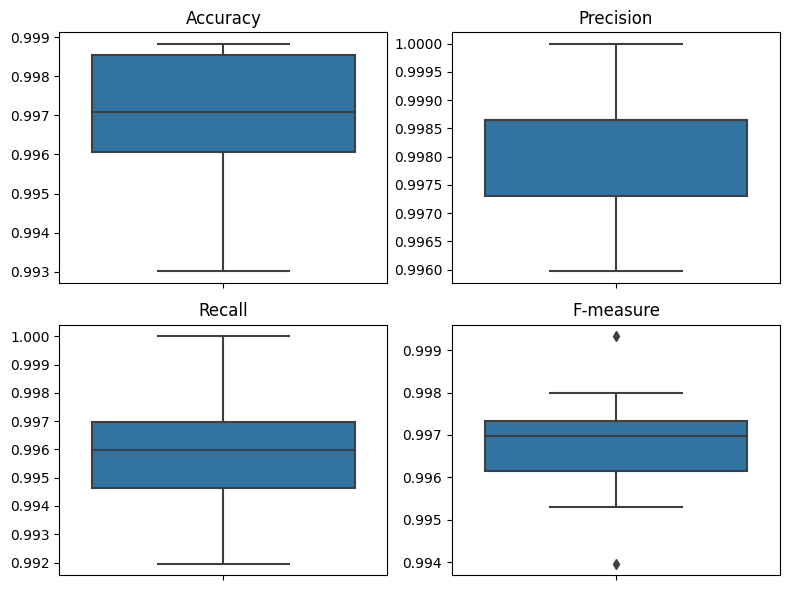

In [124]:
accuracy = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeDoS, X_DoS_test2, Y_DoS_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

#Grafiğin oluşturulması
# Plotting
plt.figure(figsize=(8, 6))
# Accuracy
plt.subplot(2, 2, 1)
sns.boxplot(y=accuracy)
plt.title('Accuracy')
# Precision
plt.subplot(2, 2, 2)
sns.boxplot(y=precision)
plt.title('Precision')
# Recall
plt.subplot(2, 2, 3)
sns.boxplot(y=recall)
plt.title('Recall')
# F-measure
plt.subplot(2, 2, 4)
sns.boxplot(y=f)
plt.title('F-measure')
plt.tight_layout()
plt.show()

**Probe**

Accuracy: 0.99365 (+/- 0.00511)
Precision: 0.99280 (+/- 0.00646)
Recall: 0.98931 (+/- 0.00980)
F-measure: 0.99017 (+/- 0.00783)


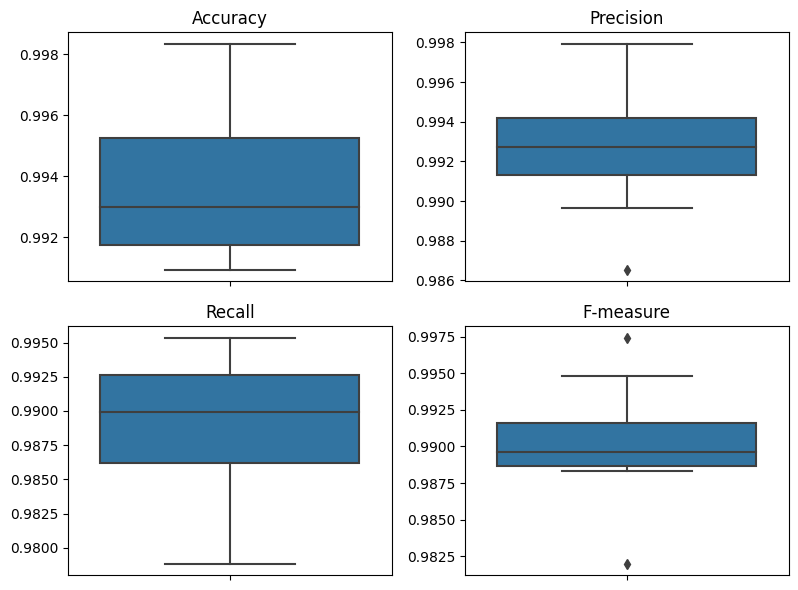

In [125]:
accuracy = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeProbe, X_Probe_test2, Y_Probe_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

#Grafiğin oluşturulması
# Plotting
plt.figure(figsize=(8, 6))
# Accuracy
plt.subplot(2, 2, 1)
sns.boxplot(y=accuracy)
plt.title('Accuracy')
# Precision
plt.subplot(2, 2, 2)
sns.boxplot(y=precision)
plt.title('Precision')
# Recall
plt.subplot(2, 2, 3)
sns.boxplot(y=recall)
plt.title('Recall')
# F-measure
plt.subplot(2, 2, 4)
sns.boxplot(y=f)
plt.title('F-measure')
plt.tight_layout()
plt.show()


**R2L**

Accuracy: 0.97737 (+/- 0.00578)
Precision: 0.97209 (+/- 0.00955)
Recall: 0.96423 (+/- 0.00930)
F-measure: 0.96923 (+/- 0.01188)


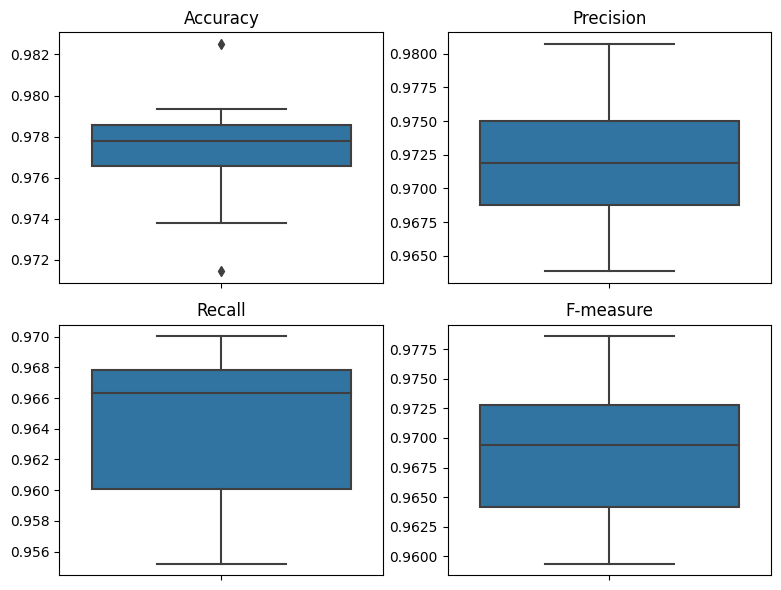

In [126]:
accuracy = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeR2L, X_R2L_test2, Y_R2L_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

#Grafiğin oluşturulması
# Plotting
plt.figure(figsize=(8, 6))
# Accuracy
plt.subplot(2, 2, 1)
sns.boxplot(y=accuracy)
plt.title('Accuracy')
# Precision
plt.subplot(2, 2, 2)
sns.boxplot(y=precision)
plt.title('Precision')
# Recall
plt.subplot(2, 2, 3)
sns.boxplot(y=recall)
plt.title('Recall')
# F-measure
plt.subplot(2, 2, 4)
sns.boxplot(y=f)
plt.title('F-measure')
plt.tight_layout()
plt.show()

**U2R**

Accuracy: 0.99693 (+/- 0.00274)
Precision: 0.93033 (+/- 0.12720)
Recall: 0.80093 (+/- 0.15785)
F-measure: 0.85485 (+/- 0.07843)


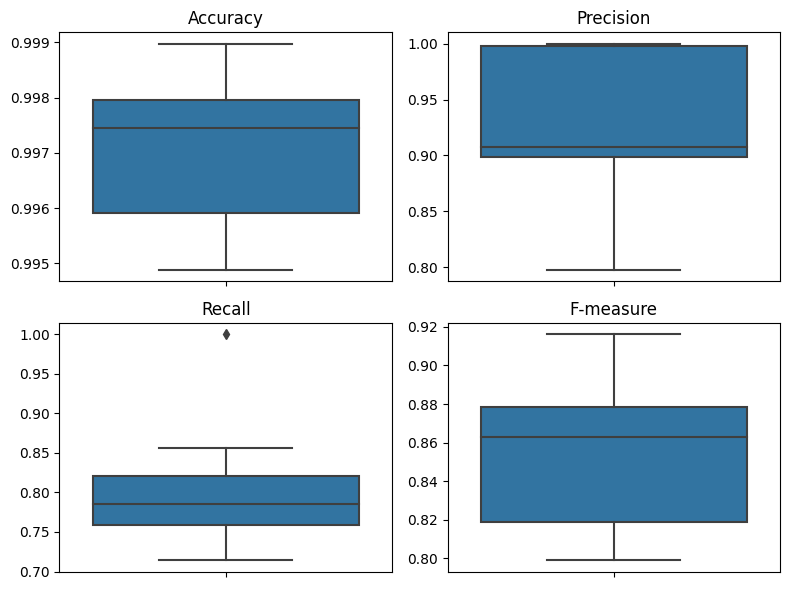

In [127]:
accuracy = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='precision_macro')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='recall_macro')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_rfeU2R, X_U2R_test2, Y_U2R_test, cv=10, scoring='f1_macro')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

#Grafiğin oluşturulması
# Plotting
plt.figure(figsize=(8, 6))
# Accuracy
plt.subplot(2, 2, 1)
sns.boxplot(y=accuracy)
plt.title('Accuracy')
# Precision
plt.subplot(2, 2, 2)
sns.boxplot(y=precision)
plt.title('Precision')
# Recall
plt.subplot(2, 2, 3)
sns.boxplot(y=recall)
plt.title('Recall')
# F-measure
plt.subplot(2, 2, 4)
sns.boxplot(y=f)
plt.title('F-measure')
plt.tight_layout()
plt.show()